In [3]:
import pandas as pd
import os

file_path = os.path.join('..', 'data', 'merged_player_stats_market_value.csv')
merged_data_df = pd.read_csv(file_path)

In [4]:
# Check for duplicates in Player column
duplicate_players = merged_data_df['Player'].duplicated().sum()
print(f"Number of duplicate players: {duplicate_players}")

# Check for players with no stats recorded
players_with_no_stats = merged_data_df[
    (merged_data_df['Goals'] == 0) &
    (merged_data_df['Assists'] == 0) &
    (merged_data_df['Minutes_Played'] == 0)
]
print(f"Players with no recorded stats:\n{players_with_no_stats[['Player', 'Position']]}")


Number of duplicate players: 0
Players with no recorded stats:
         Player Position
18  David Alaba    DF,MF


In [5]:
# Drop rows where Player is a specific value
player_to_drop = "David Alaba" 
merged_df_cleaned = merged_data_df[merged_data_df['Player'] != player_to_drop]


In [6]:
# Summary statistics for numeric columns
print(merged_df_cleaned.describe())


       Matches_Played     Starts  Minutes_Played  90s_Played      Goals  \
count       18.000000  18.000000       18.000000   18.000000  18.000000   
mean        19.388889  14.722222     1303.277778   14.488889   2.777778   
std          7.405395   9.041119      746.093418    8.299177   3.934098   
min          1.000000   0.000000       11.000000    0.100000   0.000000   
25%         16.250000   7.250000      763.000000    8.500000   0.000000   
50%         21.000000  16.000000     1373.500000   15.250000   1.500000   
75%         23.750000  22.750000     1949.000000   21.675000   2.750000   
max         29.000000  29.000000     2444.000000   27.200000  14.000000   

         Assists  Goal_Contributions  Non_Penalty_Goals  Penalty_Goals  \
count  18.000000           18.000000          18.000000      18.000000   
mean    1.777778            4.555556           2.555556       0.222222   
std     1.986885            5.490336           3.364560       0.732084   
min     0.000000            

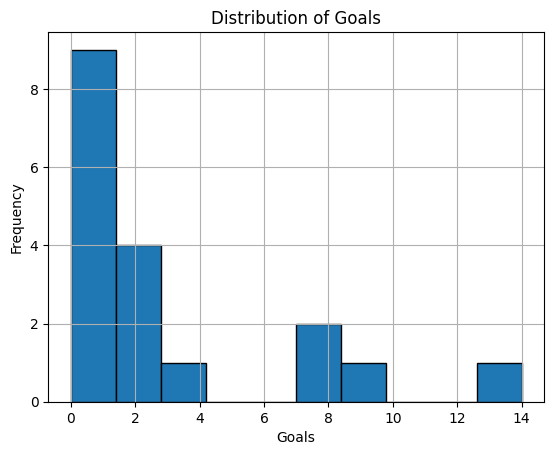

In [7]:
import matplotlib.pyplot as plt

# Histogram for Goals
merged_df_cleaned['Goals'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

In [8]:
merged_df_cleaned['Market value'] = merged_df_cleaned['Market value'].astype(str)
merged_df_cleaned['Market value'] = merged_df_cleaned['Market value'].str.replace('€', '').str.replace('m', '', regex=False)

if 'Age' not in merged_df_cleaned.columns:
    merged_df_cleaned['Age'] = merged_df_cleaned['Date of birth/Age'].str.extract(r'\((\d+)\)').astype(float)

merged_df_cleaned['Contract_End_Year'] = merged_df_cleaned['Contract'].str.extract(r'(\d{4})').astype(float)
current_year = pd.Timestamp.now().year
merged_df_cleaned['Contract_Years_Remaining'] = merged_df_cleaned['Contract_End_Year'] - current_year
merged_df_cleaned.drop(columns=['Contract_End_Year'], inplace=True)


C:\Users\mehra\AppData\Local\Temp\ipykernel_20704\824848582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['Market value'] = merged_df_cleaned['Market value'].astype(str)
C:\Users\mehra\AppData\Local\Temp\ipykernel_20704\824848582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['Market value'] = merged_df_cleaned['Market value'].str.replace('€', '').str.replace('m', '', regex=False)
C:\Users\mehra\AppData\Local\Temp\ipykernel_20704\824848582.py:5: SettingWithCopy

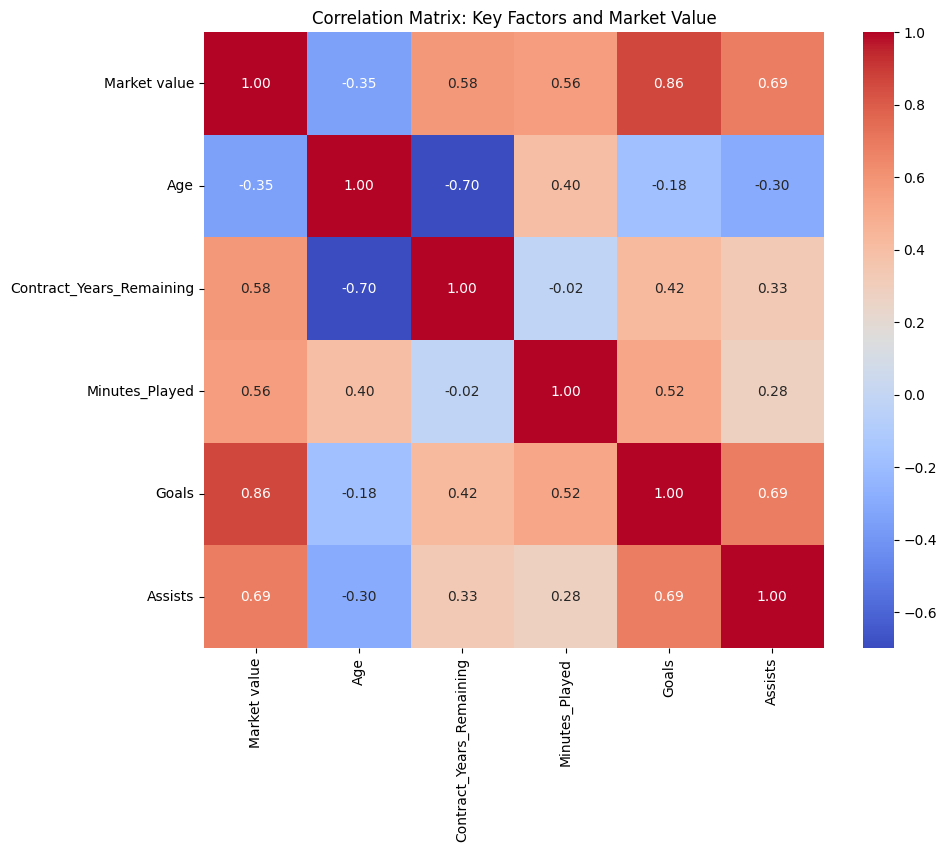

In [9]:
import seaborn as sns

# Select relevant numeric columns for correlation analysis
columns_of_interest = ['Market value', 'Age', 'Contract_Years_Remaining', 
                       'Minutes_Played', 'Goals', 'Assists']
correlation_matrix = merged_df_cleaned[columns_of_interest].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Key Factors and Market Value')
plt.show()



High Positive Correlation:

Variables like Goals, Assists, and Minutes_Played are expected to have a strong positive correlation with Market value.
Players who consistently score or assist in matches or play more minutes tend to have higher market values.

Positive Correlation:

Contract_Years_Remaining should show a positive correlation with Market value, as players with longer contracts are often seen as more valuable assets.
Teams may assign higher market values to players with secure, long-term contracts.

Negative Correlation:

Age is likely to have a negative correlation with Market value, as younger players typically have higher potential and transfer value.
Younger players, even with moderate performance, may have higher market values compared to older players with similar stats.


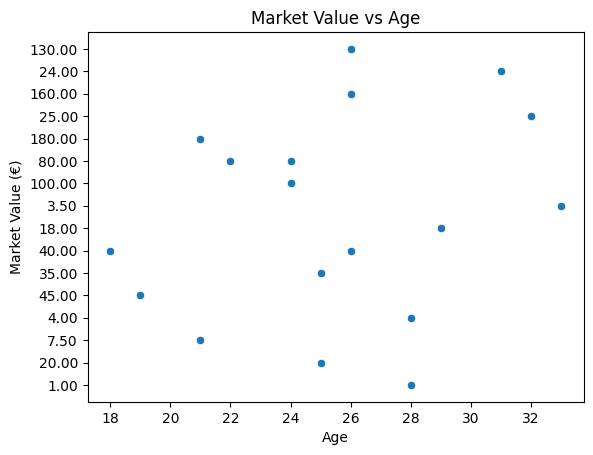

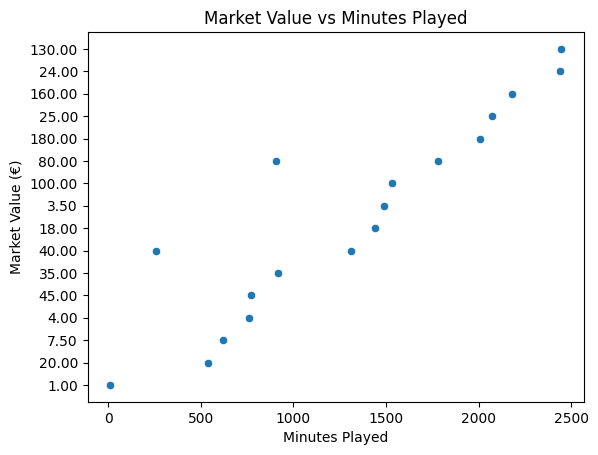

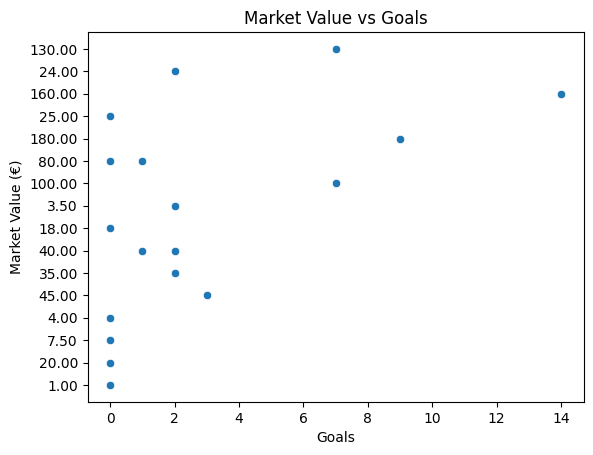

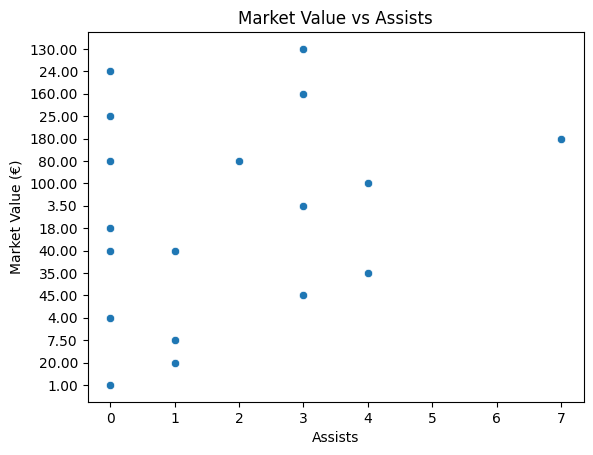

In [10]:
# Scatterplot for Age vs Market value
sns.scatterplot(x='Age', y='Market value', data=merged_df_cleaned)
plt.title('Market Value vs Age')
plt.xlabel('Age')
plt.ylabel('Market Value (€)')
plt.show()

# Scatterplot for Minutes Played vs Market value
sns.scatterplot(x='Minutes_Played', y='Market value', data=merged_df_cleaned)
plt.title('Market Value vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Market Value (€)')
plt.show()

# Scatterplot for Goals vs Market value
sns.scatterplot(x='Goals', y='Market value', data=merged_df_cleaned)
plt.title('Market Value vs Goals')
plt.xlabel('Goals')
plt.ylabel('Market Value (€)')
plt.show()

# Scatterplot for Assists vs Market value
sns.scatterplot(x='Assists', y='Market value', data=merged_df_cleaned)
plt.title('Market Value vs Assists')
plt.xlabel('Assists')
plt.ylabel('Market Value (€)')
plt.show()


In [11]:
merged_df_cleaned['Market value'] = pd.to_numeric(merged_df_cleaned['Market value'], errors='coerce')

C:\Users\mehra\AppData\Local\Temp\ipykernel_20704\2006220567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['Market value'] = pd.to_numeric(merged_df_cleaned['Market value'], errors='coerce')


In [12]:
# Select only relevant columns for grouping
numeric_columns = ['Goals', 'Assists', 'Market value']
position_grouped = merged_df_cleaned.groupby('Position')[numeric_columns].mean()
print(position_grouped)

             Goals   Assists  Market value
Position                                  
DF        0.833333  0.833333     15.666667
FW        8.000000  1.500000    100.000000
FW,MF     4.500000  4.000000     67.500000
GK        0.000000  0.500000     22.500000
MF        3.250000  3.000000     77.250000
MF,DF     3.500000  1.500000    105.000000


The high market value aligns with the importance of goal-scoring in football.
Teams invest heavily in forwards due to their direct impact on winning games.

Midfielders often play dual roles—creating chances, ball rotation, connecting defense and offense, and occasionally scoring.
Their market value reflects their versatility and importance in controlling games.

The lower market values align with the fact that defenders and goalkeepers are less involved in direct goal contributions.
Their value often depends on other factors (e.g., defensive performance, clean sheets).


C:\Users\mehra\AppData\Local\Temp\ipykernel_20704\238136012.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Position', y='Goals', data=merged_df_cleaned, ci=None)


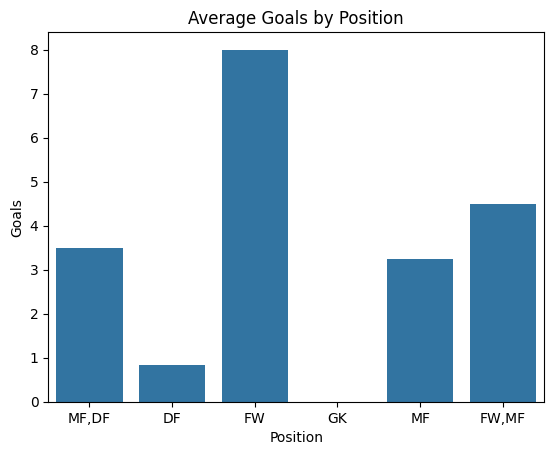

In [13]:
sns.barplot(x='Position', y='Goals', data=merged_df_cleaned, ci=None)
plt.title('Average Goals by Position')
plt.show()

In [14]:
# Detecting outliers in the market value
high_value_players = merged_df_cleaned[merged_df_cleaned['Market value'] > merged_df_cleaned['Market value'].quantile(0.95)]
print(high_value_players[['Player', 'Market value', 'Goals', 'Assists']])


            Player  Market value  Goals  Assists
4  Jude Bellingham         180.0    9.0      7.0


In [15]:
merged_df_cleaned['Total_Contributions'] = merged_df_cleaned['Goals'] + merged_df_cleaned['Assists']


C:\Users\mehra\AppData\Local\Temp\ipykernel_20704\2900582474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['Total_Contributions'] = merged_df_cleaned['Goals'] + merged_df_cleaned['Assists']


In [16]:
merged_df_cleaned

,Player,Position,Matches_Played,Starts,Minutes_Played,90s_Played,Goals,Assists,Goal_Contributions,Non_Penalty_Goals,...,#,Date of birth/Age,Height,Foot,Contract,Market value,Nat.,Age,Contract_Years_Remaining,Total_Contributions
0,Federico Valverde,"MF,DF",29,29,2444.0,27.2,7.0,3.0,10.0,7.0,...,8,"Jul 22, 1998 (26)","1,82m",right,"Jun 30, 2029",130.0,"['Uruguay', 'Spain']",26.0,4.0,10.0
1,Antonio Rüdiger,DF,28,27,2437.0,27.1,2.0,0.0,2.0,2.0,...,22,"Mar 3, 1993 (31)","1,90m",right,"Jun 30, 2026",24.0,"['Germany', 'Sierra Leone']",31.0,1.0,2.0
2,Kylian Mbappé,FW,27,25,2177.0,24.2,14.0,3.0,17.0,11.0,...,9,"Dec 20, 1998 (26)","1,78m",right,"Jun 30, 2029",160.0,"['France', 'Cameroon']",26.0,4.0,17.0
3,Thibaut Courtois,GK,23,23,2070.0,23.0,0.0,0.0,0.0,0.0,...,1,"May 11, 1992 (32)","2,00m",left,"Jun 30, 2026",25.0,Belgium,32.0,1.0,0.0
4,Jude Bellingham,MF,24,24,2005.0,22.3,9.0,7.0,16.0,8.0,...,5,"Jun 29, 2003 (21)","1,86m",right,"Jun 30, 2029",180.0,"['England', 'Ireland']",21.0,4.0,16.0
5,Aurélien Tchouaméni,"MF,DF",23,22,1781.0,19.8,0.0,0.0,0.0,0.0,...,14,"Jan 27, 2000 (24)","1,88m",right,"Jun 30, 2028",80.0,"['France', 'Cameroon']",24.0,3.0,0.0
6,Rodrygo,"FW,MF",23,17,1529.0,17.0,7.0,4.0,11.0,7.0,...,11,"Jan 9, 2001 (24)","1,74m",right,"Jun 30, 2028",100.0,"['Brazil', 'Spain']",24.0,3.0,11.0
7,Lucas Vázquez,DF,25,17,1491.0,16.6,2.0,3.0,5.0,2.0,...,17,"Jul 1, 1991 (33)","1,73m",right,"Jun 30, 2025",3.5,Spain,33.0,0.0,5.0
8,Ferland Mendy,DF,20,18,1438.0,16.0,0.0,0.0,0.0,0.0,...,23,"Jun 8, 1995 (29)","1,80m",left,"Jun 30, 2025",18.0,"['France', 'Senegal']",29.0,0.0,0.0
9,Éder Militão,DF,17,15,1309.0,14.5,1.0,1.0,2.0,1.0,...,3,"Jan 18, 1998 (26)","1,86m",right,"Jun 30, 2028",40.0,"['Brazil', 'Spain']",26.0,3.0,2.0


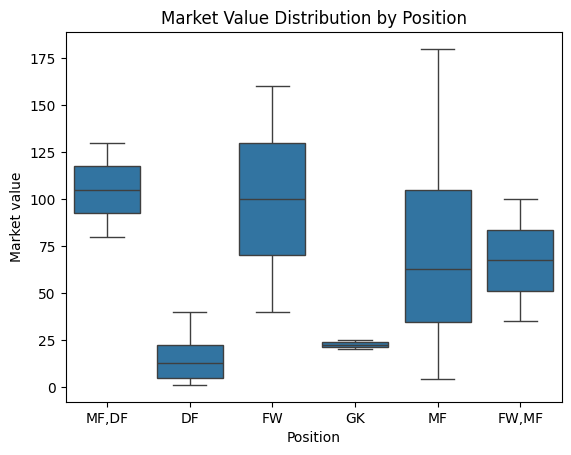

In [17]:
sns.boxplot(x='Position', y='Market value', data=merged_df_cleaned)
plt.title('Market Value Distribution by Position')
plt.show()

This is grouped by position of the players and demonstrate their contributions and their marke value within the position they play in.

In [18]:
# Extract the age from the 'Date of birth/Age' column
merged_df_cleaned['Age'] = merged_df_cleaned['Date of birth/Age'].str.extract(r'\((\d+)\)').astype(float)

# Verify the extracted Age column
print(merged_df_cleaned[['Date of birth/Age', 'Age']].head())


   Date of birth/Age   Age
0  Jul 22, 1998 (26)  26.0
1   Mar 3, 1993 (31)  31.0
2  Dec 20, 1998 (26)  26.0
3  May 11, 1992 (32)  32.0
4  Jun 29, 2003 (21)  21.0


C:\Users\mehra\AppData\Local\Temp\ipykernel_20704\2312455595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['Age'] = merged_df_cleaned['Date of birth/Age'].str.extract(r'\((\d+)\)').astype(float)


In [19]:
# Bin Age into groups excluding 34+
merged_df_cleaned['Age_Group'] = pd.cut(
    merged_df_cleaned['Age'], bins=[18, 23, 28, 33], labels=['18-23', '24-28', '29-33'], right=True
)

# Group by Age_Group and calculate mean for numeric columns
numeric_columns = ['Goals', 'Assists', 'Market value']
age_grouped = merged_df_cleaned.groupby('Age_Group')[numeric_columns].mean()

# Display the grouped data
print(age_grouped)


              Goals   Assists  Market value
Age_Group                                  
18-23      3.250000  3.250000     78.125000
24-28      3.444444  1.777778     63.333333
29-33      1.000000  0.750000     17.625000


C:\Users\mehra\AppData\Local\Temp\ipykernel_20704\2262278325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['Age_Group'] = pd.cut(
C:\Users\mehra\AppData\Local\Temp\ipykernel_20704\2262278325.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = merged_df_cleaned.groupby('Age_Group')[numeric_columns].mean()


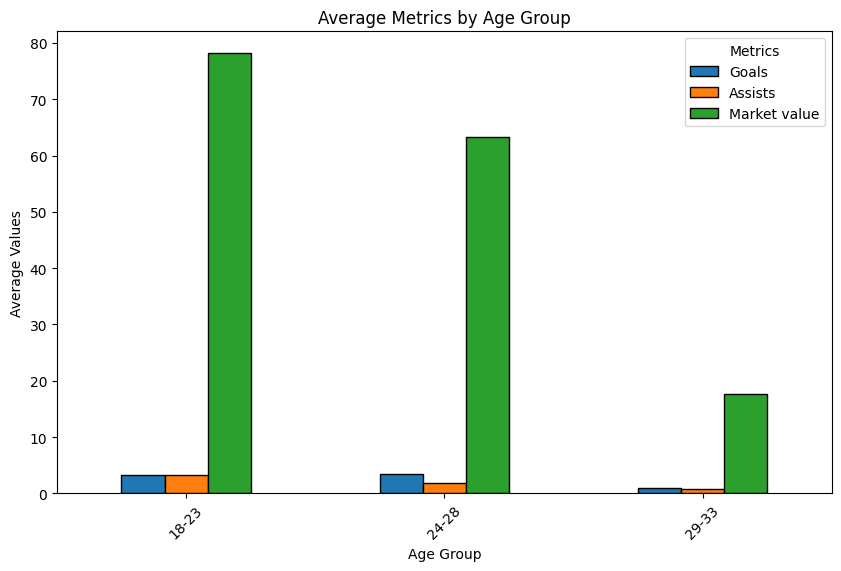

In [20]:
# Combined bar plot for Goals, Assists, and Market Value
age_grouped[['Goals', 'Assists', 'Market value']].plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Average Metrics by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Values')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.show()


Observation: The 18-23 age group likely has the highest average market value.
Insight:
Younger players are often considered to have greater potential, which inflates their market value.
Teams prioritize investing in younger players for long-term benefits.

Observation: The 24-28 group might show the highest contributions in Goals and Assists.
Insight:
Players in this age group are typically in their prime, contributing the most to team performance.
This group balances experience

Observation: The 29-33 age group shows a decline in average goals, assists, and market value.
Insight:
Performance begins to wane for players in their late 20s and early 30s.
Market value decreases as players approach the latter stages of their careers.

Key takeaways and conclusion

Invest in Young Talent:

Focus on acquiring and nurturing players in the 18-23 age group for future success and resale value.
Build Around Prime Players:
Players in the 24-28 range are essential for immediate impact on team success.
Evaluate Older Players:
Players in the 29-33 range should be assessed for roles that balance experience and leadership while accounting for declining contributions.


In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os

# Specify numeric features to scale
numeric_features = [
    'Matches_Played', 'Starts', 'Minutes_Played', 'Goals', 'Assists',
    'Goal_Contributions', 'Non_Penalty_Goals', 'Penalty_Goals',
    'Yellow_Cards', 'Red_Cards', 'Expected_Goals', 'Expected_Assists',
    'Progressive_Carries', 'Progressive_Passes', 'Progressive_Runs', 'Market value'
]

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric features
scaled_features = scaler.fit_transform(merged_df_cleaned[numeric_features])

# Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=[f"{col}_scaled" for col in numeric_features])

# Concatenate scaled features with the original DataFrame
final_df = pd.concat([merged_df_cleaned, scaled_df], axis=1)

# Define the path to save the preprocessed data
processed_folder = os.path.join(os.getcwd(), 'data', 'processed')
os.makedirs(processed_folder, exist_ok=True)

processed_path = os.path.join(processed_folder, 'preprocessed_data.csv')

# Save the preprocessed DataFrame
final_df.to_csv(processed_path, index=False)

print(f"Preprocessed data saved to {processed_path}")

Preprocessed data saved to c:\Users\mehra\Clones\LHL-Final-Project\notebooks\data\processed\preprocessed_data.csv
